In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the iris dataset
Superstore = pd.read_csv('SampleSuperstore.csv')
Superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
Superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
Superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Top 20 Cities by Sales Volume

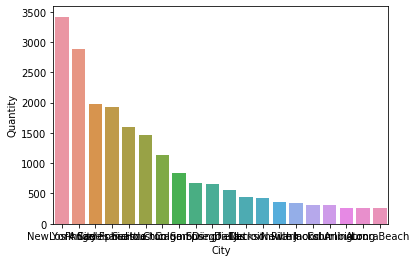

In [5]:

sale_cities = Superstore.groupby(["City"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "City",     # Data is groupedby this variable
            y= "Quantity",          
            data=sale_cities,
            )

### the distribution of our customer segment

In [6]:
descending_order = Superstore['Segment'].value_counts().index

Superstore.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

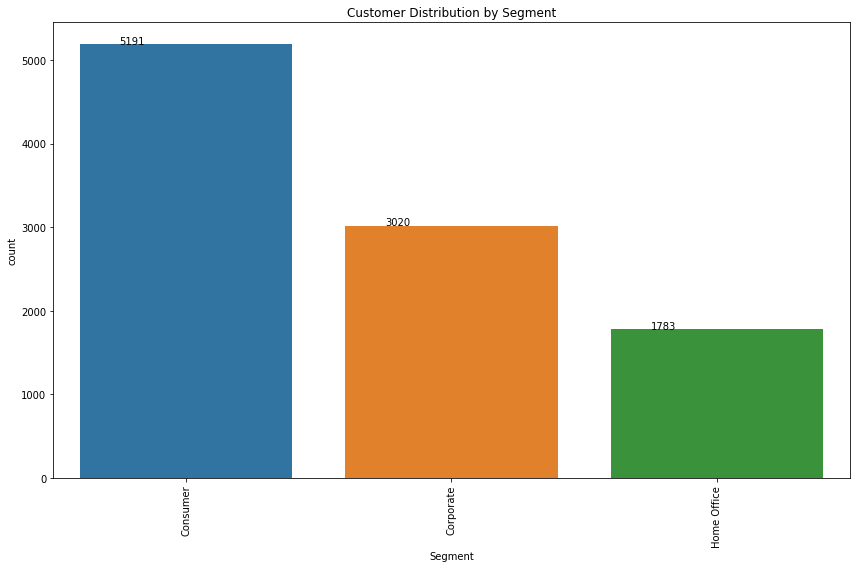

In [7]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x="Segment", data=Superstore, ax=ax)
ax.set_title("Customer Distribution by Segment")
ax.set_xticklabels(p.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.tight_layout()
plt.show()

### Distribution of  Customers by Region & State - top 15

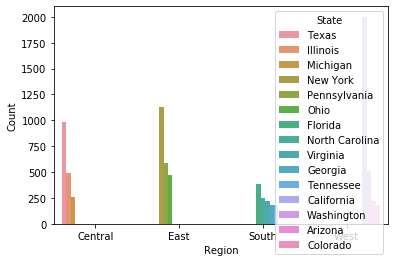

In [8]:

Customers_Country = pd.DataFrame({'Count' : Superstore.groupby(["State","Region"]).size()}).reset_index().sort_values('Count',ascending = False).head(15)
Customers_Country

sns.barplot(x = "Region",     # Data is groupedby this variable
            y= "Count",  
            hue="State",
            data = Customers_Country.sort_values('Region')
            )


### Top 20 Cities by Sales Volume

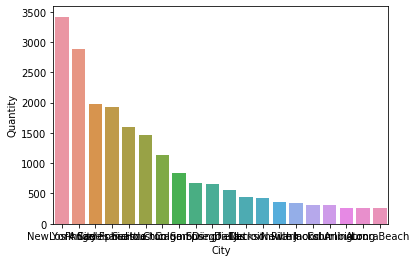

In [9]:

sale_cities = Superstore.groupby(["City"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "City",     # Data is groupedby this variable
            y= "Quantity",          
            data=sale_cities,
            )

### sales by product Category, Sub-category

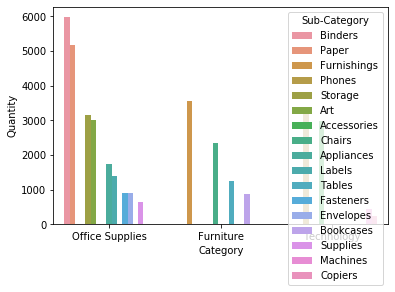

In [10]:

sale_category = Superstore.groupby(["Category","Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False)
sale_category
sns.barplot(x = "Category",     # Data is groupedby this variable
            hue="Sub-Category",
            y= "Quantity",          
            data=sale_category)


### Relationship between sales and profit -- use scatter plot


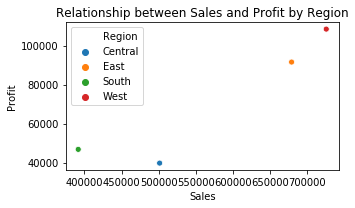

In [11]:

regionwiseSalesAndProfit = Superstore.groupby("Region").agg({"Sales":np.sum, "Profit": np.sum})
regionwiseSalesAndProfit
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="Sales", y="Profit", hue=regionwiseSalesAndProfit.index, data=regionwiseSalesAndProfit) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Region")
plt.tight_layout()
plt.show()

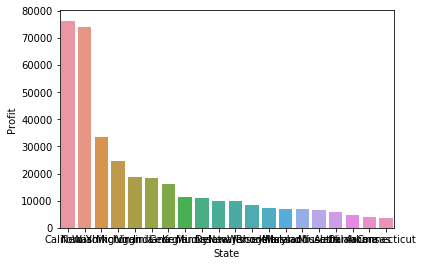

In [12]:
result = Superstore.groupby(["State"])[['Profit','Discount']].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)
result.head
type(result)
result.shape
result
sns.barplot(x = "State",y= "Profit",data=result)

### number of orders placed for different discount ranges based on category

In [13]:
Superstore.loc[Superstore['Discount']>=0.40].groupby('Category').size().reset_index(name='count').sort_values('count', ascending=False)

lessDiscountdf=Superstore.loc[Superstore['Discount']<0.40].groupby('Category').size().reset_index(name='count').sort_values('count', ascending=False)
lessDiscountdf

,Category,count
1,Office Supplies,5346
0,Furniture,1828
2,Technology,1681
